### 1. Explain succinctly in your own words (but working with a ChatBot if needed)...

**1. the difference between Simple Linear Regression and Multiple Linear Regression; and the benefit the latter provides over the former**

Simple linear regression provides a fitted linear model using only one input and one response variable, whereas a multiple linear regression model is able to incorporate multiple variables, and as a result is able to give estimates more faithful to the examined data.

**2. the difference between using a continuous variable and an indicator variable in Simple Linear Regression; and these two linear forms**

A continuous variable will always apply, and works similar to a coefficient. An indicator variable on the other hand only applies some of the time, and works similar to a continuous except for the fact that it is only factored into the prediction when appropriate

**3. the change that happens in the behavior of the model (i.e., the expected nature of the data it models) when a single indicator variable is introduced alongside a continuous variable to create a Multiple Linear Regression; and these two linear forms (i.e., the Simple Linear Regression versus the Multiple Linear Regression)**

When the two variables are combined they allow the data to represent different ways in which the expected results will behave across multiple conditions. This allows the regression to mirror the fact that data will not always follow a smooth pattern.

**4. the effect of adding an interaction between a continuous and an indicator variable in Multiple Linear Regression models; and this linear form**

This will again allow the data to represent ways in which the relationship between variables and expected response may not always be perfectly smooth, and that the data will behave differently when faced with different conditions.

**5. the behavior of a Multiple Linear Regression model (i.e., the expected nature of the data it models) based only on indicator variables derived from a non-binary categorical variable; this linear form; and the necessarily resulting binary variable encodings it utilizes**

Ultimately the data prediction will look like a series of shifts, exemplifying the weight of each potential category in the variable. We do this by having k-1 binary variables to represent all the options that could be true.

### 2. Explain in your own words (but working with a ChatBot if needed) what the specific (outcome and predictor) variables are for the scenario below; whether or not any meaningful interactions might need to be taken into account when predicting the outcome; and provide the linear forms with and without the potential interactions that might need to be considered

1. Explain how to use these two formulas to make predictions of the outcome, and give a high level explaination in general terms of the difference between predictions from the models with and without the interaction

Depending on whether or not there is interaction between the two variables, we will add in an additional variable into the equation to represent the *interaction effect* between the two variables. So in this case there would be one predictor variable for the effectiveness of the TV ads, one for the effectiveness of the online ads, and then one that represented the interaction of the combined spend on both variables

Effectiveness = β₀ + β₁ (TV Spend) + β₂ (Online Spend) + β₃ (TV Spend × Online Spend) + ε


2. Explain how to update and use the implied two formulas to make predictions of the outcome if, rather than considering two continuous predictor variables, we instead suppose the advertisement budgets are simply categorized as either "high" or "low" (binary variables)

In this case, β₀ will represent the spend when both are low, and the other variables will be indicated "yes", or =1 when the spend is high. The coefficients will represent the difference between low spend and high spend. 

Effectiveness = β₀ + β₁ (TV Spend Dummy) + β₂ (Online Spend Dummy) + β₃ (TV Spend Dummy × Online Spend Dummy) + ε


### 3. Use smf to fit multiple linear regression models to the course project dataset from the canadian social connection survey

Listen I am gonna be so honest I have no idea what of this problem I am actually supposed to do. Maybe it would make sense if the prof didn't just cross out half of the question. Like genuinely I have no idea what to do here.

Index(['UNIQUE_id', 'UNIQUE_num_records', 'ELIGIBLE_consent',
       'GEO_residence_canada', 'GEO_province', 'DEMO_age', 'DEMO_gender',
       'DEMO_identity_vetrans', 'DEMO_identity_indigenous',
       'DEMO_identity_lgbtq',
       ...
       'PSYCH_body_self_image_questionnaire_height_dissatisfaction_score',
       'PSYCH_body_self_image_questionnaire_fatness_evaluation_score',
       'PSYCH_body_self_image_questionnaire_negative_affect_score',
       'PSYCH_body_self_image_questionnaire_social_dependence_score',
       'PSYCH_big_five_inventory_agreeable_score',
       'PSYCH_big_five_inventory_conscientious_score',
       'PSYCH_big_five_inventory_extraverted_score',
       'PSYCH_big_five_inventory_neurotic_score',
       'PSYCH_big_five_inventory_open_score', 'REMOVE_case'],
      dtype='object', length=1794)
                                                 OLS Regression Results                                                
Dep. Variable:     PSYCH_body_self_image_questionnair

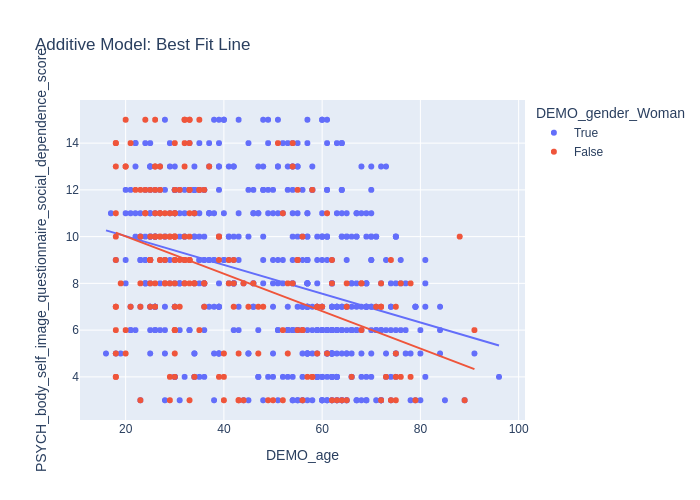

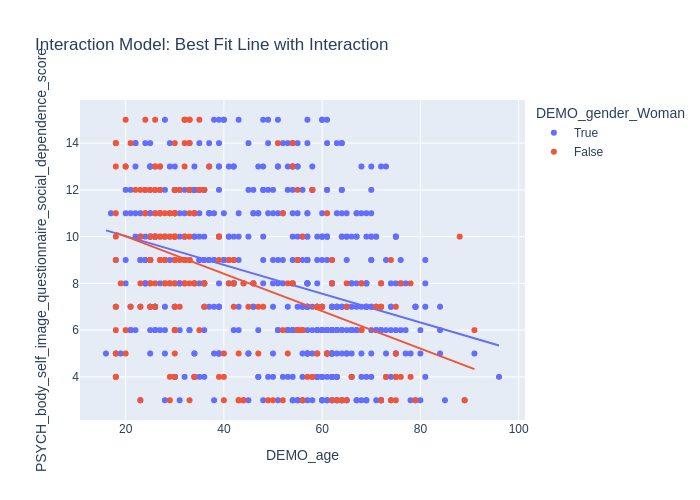

In [2]:
import pandas as pd
import statsmodels.formula.api as smf
import plotly.express as px

# Step 1: Load the dataset
df = pd.read_csv('CSCS_data_anon.csv', low_memory=False)

# Step 2: Inspect the columns to identify the outcome variable and categorical predictor
print(df.columns)

# In this case, I will assume the outcome variable is social dependence score:
# and we will use DEMO_gender as a binary indicator.

# Step 3: Convert 'DEMO_gender' into dummy variables
# We'll drop the first category (e.g., "Man") to avoid multicollinearity.
df = pd.get_dummies(df, columns=['DEMO_gender'], drop_first=True)

# Step 4: Check for missing values and drop them for simplicity (you can handle them differently)
df = df.dropna(subset=['PSYCH_body_self_image_questionnaire_social_dependence_score', 'DEMO_age', 'DEMO_gender_Woman'])

# Step 5: Fit the additive model (without interaction)
additive_model = smf.ols(
    'PSYCH_body_self_image_questionnaire_social_dependence_score ~ DEMO_age + DEMO_gender_Woman', data=df
).fit()

# Print the model summary for interpretation
print(additive_model.summary())

# Step 6: Fit the interaction model (with age * gender interaction)
interaction_model = smf.ols(
    'PSYCH_body_self_image_questionnaire_social_dependence_score ~ DEMO_age * DEMO_gender_Woman', data=df
).fit()

# Print the interaction model summary for interpretation
print(interaction_model.summary())

# Step 7: Predictions from both models for a new data point (example: age 30, Woman)
new_data = pd.DataFrame({
    'DEMO_age': [30],
    'DEMO_gender_Woman': [1]  # Assuming we're predicting for a woman
})

# Predictions from the additive model
additive_prediction = additive_model.predict(new_data)
print(f"Predicted social dependence score (Additive): {additive_prediction[0]}")

# Predictions from the interaction model
interaction_prediction = interaction_model.predict(new_data)
print(f"Predicted social dependence score (Interaction): {interaction_prediction[0]}")

# Step 8: Plot data with best-fit lines using Plotly
# Additive Model Plot
fig_additive = px.scatter(df, x='DEMO_age', y='PSYCH_body_self_image_questionnaire_social_dependence_score',
                          color='DEMO_gender_Woman', trendline='ols', title="Additive Model: Best Fit Line")
fig_additive.show(renderer="png")

# Interaction Model Plot (showing interaction effects)
fig_interaction = px.scatter(df, x='DEMO_age', y='PSYCH_body_self_image_questionnaire_social_dependence_score',
                              color='DEMO_gender_Woman', trendline='ols', title="Interaction Model: Best Fit Line with Interaction")
fig_interaction.show(renderer="png")


Ok so there we have multiple linear regressions depending on gender and age, we can see that men and women have different coeffecients. The p-values tell us that we have evidence to suggest a correlation between the input and response variables for age, but not for gender.

### 1. Additive Model (Without Interaction)

**Social Engagement** = β₀ + β₁ * **Age** + β₂ * **Income** + β₃ * **Marital Status (Married)** + ε

### 2. Synergistic (Interaction) Model

**Social Engagement** = β₀ + β₁ * **Age** + β₂ * **Income** + β₃ * **Marital Status (Married)** + β₄ * (**Age** * **Income**) + ε

And we can use gender as a variable by having it be an indicator variable and have the coefficient be the difference in the effect between genders.

### 4. Explain the apparent contradiction between the factual statements regarding the fit below that "the model only explains 17.6% of the variability in the data" while at the same time "many of the coefficients are larger than 10 while having strong or very strong evidence against the null hypothesis of 'no effect'"

In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/KeithGalli/pandas/master/pokemon_data.csv"
# fail https://github.com/KeithGalli/pandas/blob/master/pokemon_data.csv
pokeaman = pd.read_csv(url) 
pokeaman

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


In [4]:
import statsmodels.formula.api as smf

model1_spec = smf.ols(formula='HP ~ Q("Sp. Def") + C(Generation)', data=pokeaman)
model2_spec = smf.ols(formula='HP ~ Q("Sp. Def") + C(Generation) + Q("Sp. Def"):C(Generation)', data=pokeaman)
model2_spec = smf.ols(formula='HP ~ Q("Sp. Def") * C(Generation)', data=pokeaman)

model2_fit = model2_spec.fit()
model2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     15.27
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           3.50e-27
Time:                        20:44:03   Log-Likelihood:                -3649.4
No. Observations:                 800   AIC:                             7323.
Df Residuals:                     788   BIC:                             7379.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          26.8971      5.246      5.127      0.000      16.599      37.195
C(Generation)[T.2]                 20.0449      7.821      2.563      0.011       4.692      35.398
C(Generation)[T.3]                 21.3662      6.998      3.053      0.002       7.629      35.103
C(Generation)[T.4]                 31.9575      8.235      3.881      0.000      15.793      48.122
C(Generation)[T.5]                  9.4926      7.883      1.204      0.229      -5.982      24.968
C(Generation)[T.6]                 22.2693      8.709      2.557      0.011       5.173      39.366
Q("Sp. Def")                        0.5634      0.071      7.906      0.000       0.423       0.703
Q("Sp. Def"):C(Generation)[T.2]    -0.2350      0.101     -2.316      0.021      -0.434      -0.036
Q("Sp. Def"):C(Generation)[T.3]    -0.3067      0.093     -3.300      0.001      -0.489      -0.124
Q("Sp. Def"):C(Generation)[T.4]    -0.3790      0.105     -3.600      0.000      -0.586      -0.172
Q("Sp. Def"):C(Generation)[T.5]    -0.0484      0.108     -0.447      0.655      -0.261       0.164
Q("Sp. Def"):C(Generation)[T.6]    -0.3083      0.112     -2.756      0.006      -0.528      -0.089
==============================================================================
Omnibus:                      337.229   Durbin-Watson:                   1.505
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2871.522
Skew:                           1.684   Prob(JB):                         0.00
Kurtosis:                      11.649   Cond. No.                     1.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Essentially, this indicates that there are many other variables that have an impact on the response variable, which means that even though there is strong evidence connection between the variability explained by the model in terms of p-value, that variability does not make up most of the variability in the response variable. There are potentially many other factors that have an effect on the response variable that our model is not able to capture.

### 5. Discuss the following (five cells of) code and results with a ChatBot and based on the understanding you arrive at in this conversation explain what the following (five cells of) are illustrating

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split

fifty_fifty_split_size = int(pokeaman.shape[0]*0.5)

# Replace "NaN" (in the "Type 2" column with "None")
pokeaman.fillna('None', inplace=True)

np.random.seed(130)
pokeaman_train,pokeaman_test = \
  train_test_split(pokeaman, train_size=fifty_fifty_split_size)
pokeaman_train

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
370,338,Solrock,Rock,Psychic,70,95,85,55,65,70,3,False
6,6,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
242,224,Octillery,Water,None,75,105,75,105,75,45,2,False
661,600,Klang,Steel,None,60,80,95,70,85,50,5,False
288,265,Wurmple,Bug,None,45,45,35,20,30,20,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...
522,471,Glaceon,Ice,None,65,60,110,130,95,65,4,False
243,225,Delibird,Ice,Flying,45,55,45,65,45,75,2,False
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
117,109,Koffing,Poison,None,40,65,95,60,45,35,1,False


This code splits the pokemon dataset into two halves: one for training and one for testing. It also replaces all NaN values in type 2 column with "None"

In [6]:
model_spec3 = smf.ols(formula='HP ~ Attack + Defense', 
                      data=pokeaman_train)
model3_fit = model_spec3.fit()
model3_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     34.40
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           1.66e-14
Time:                        20:44:08   Log-Likelihood:                -1832.6
No. Observations:                 400   AIC:                             3671.
Df Residuals:                     397   BIC:                             3683.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.5882      3.580     11.897      0.000      35.551      49.626
Attack         0.2472      0.041      6.051      0.000       0.167       0.327
Defense        0.1001      0.045      2.201      0.028       0.011       0.190
==============================================================================
Omnibus:                      284.299   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5870.841
Skew:                           2.720   Prob(JB):                         0.00
Kurtosis:                      20.963   Cond. No.                         343.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This code makes a fitted model with HP as the output and Attack and Defense as the input variables. Then it takes a look at the data and the model and sees if the relationship between the variables is statistically significant.

In [7]:
yhat_model3 = model3_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model3_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model3)[0,1]**2)

'In sample' R-squared:     0.14771558304519894
'Out of sample' R-squared: 0.21208501873920738


This code generates the R-squared for the sample of data that we had generated the line of best fit for, and calculates the R-squared for data that were not included in our sample, and uses these to establish both the R-swuared within our sample, but also the R-squared for any additional data we would use.

In [8]:
model4_linear_form = 'HP ~ Attack * Defense * Speed * Legendary'
model4_linear_form += ' * Q("Sp. Def") * Q("Sp. Atk")'
# DO NOT try adding '* C(Generation) * C(Q("Type 1")) * C(Q("Type 2"))'
# That's 6*18*19 = 6*18*19 possible interaction combinations...
# ...a huge number that will blow up your computer

model4_spec = smf.ols(formula=model4_linear_form, data=pokeaman_train)
model4_fit = model4_spec.fit()
model4_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     4.764
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           4.23e-21
Time:                        20:44:14   Log-Likelihood:                -1738.6
No. Observations:                 400   AIC:                             3603.
Df Residuals:                     337   BIC:                             3855.
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                          521.5715    130.273      4.004      0.000     265.322     777.821
Legendary[T.True]                                                   -6.1179      2.846     -2.150      0.032     -11.716      -0.520
Attack                                                              -8.1938      2.329     -3.518      0.000     -12.775      -3.612
Attack:Legendary[T.True]                                         -1224.9610    545.105     -2.247      0.025   -2297.199    -152.723
Defense                                                             -6.1989      2.174     -2.851      0.005     -10.475      -1.923
Defense:Legendary[T.True]                                         -102.4030     96.565     -1.060      0.290    -292.350      87.544
Attack:Defense                                                       0.0985      0.033      2.982      0.003       0.034       0.164
Attack:Defense:Legendary[T.True]                                    14.6361      6.267      2.336      0.020       2.310      26.963
Speed                                                               -7.2261      2.178     -3.318      0.001     -11.511      -2.942
Speed:Legendary[T.True]                                            704.8798    337.855      2.086      0.038      40.309    1369.450
Attack:Speed                                                         0.1264      0.038      3.351      0.001       0.052       0.201
Attack:Speed:Legendary[T.True]                                       5.8648      2.692      2.179      0.030       0.570      11.160
Defense:Speed                                                        0.1026      0.039      2.634      0.009       0.026       0.179
Defense:Speed:Legendary[T.True]                                     -6.9266      3.465     -1.999      0.046     -13.742      -0.111
Attack:Defense:Speed                                                -0.0016      0.001     -2.837      0.005      -0.003      -0.001
Attack:Defense:Speed:Legendary[T.True]                              -0.0743      0.030     -2.477      0.014      -0.133      -0.015
Q("Sp. Def")                                                        -5.3982      1.938     -2.785      0.006      -9.211      -1.586
Legendary[T.True]:Q("Sp. Def")                                    -282.2496    126.835     -2.225      0.027    -531.738     -32.761
Attack:Q("Sp. Def")                                                  0.1094      0.034      3.233      0.001       0.043       0.176
Attack:Legendary[T.True]:Q("Sp. Def")                               12.6503      5.851      2.162      0.031       1.141      24.160
Defense:Q("Sp. Def")    

This code factors in speed, legendary, sp. attack, and sp. defense, and also considers interaction between variables. The summary that it generates will allow us to determine which of the variables have significant affect on HP and are important in terms of interaction.

In [12]:
yhat_model4 = model4_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model4_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model4)[0,1]**2)

'In sample' R-squared:     0.46709442115833855
'Out of sample' R-squared: 0.002485342598992873


This provides a similar analysis to the prior one that analyzed the R-squared within the sample used to generate the best fit line, and then for the data outside of it. We can see that as the model comes to fit our data more closely, it will provide less of an explanation for the variance of other data.

### 6. Work with a ChatBot to understand how the model4_linear_form (linear form specification of model4) creates new predictor variables as the columns of the so-called "design matrix" model4_spec.exog (model4_spec.exog.shape) used to predict the outcome variable model4_spec.endog and why the so-called multicollinearity in this "design matrix" (observed in np.corrcoef(model4_spec.exog)) contribues to the lack of "out of sample" generalization of predictions from model4_fit; then, explain this consisely in your own works

Basically, with the complexity of the many variables, they begin to overlap in their coverage, resulting in a matrix with extreme colinearity. Because of the colinearity, the model will fit the sample too well, and will be less helpful to predict data points outside of the sample.

### 7. Discuss with a ChatBot the rationale and principles by which model5_linear_form is extended and developed from model3_fit and model4_fit; model6_linear_form is extended and developed from model5_linear_form; and model7_linear_form is extended and developed from model6_linear_form; then, explain this breifly and consisely in your own words

In [9]:
# Here's something a little more reasonable...
model5_linear_form = 'HP ~ Attack + Defense + Speed + Legendary'
model5_linear_form += ' + Q("Sp. Def") + Q("Sp. Atk")'
model5_linear_form += ' + C(Generation) + C(Q("Type 1")) + C(Q("Type 2"))'

model5_spec = smf.ols(formula=model5_linear_form, data=pokeaman_train)
model5_fit = model5_spec.fit()
model5_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     4.948
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           9.48e-19
Time:                        20:44:18   Log-Likelihood:                -1765.0
No. Observations:                 400   AIC:                             3624.
Df Residuals:                     353   BIC:                             3812.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     10.1046     14.957      0.676      0.500     -19.312      39.521
Legendary[T.True]             -3.2717      4.943     -0.662      0.508     -12.992       6.449
C(Generation)[T.2]             9.2938      4.015      2.315      0.021       1.398      17.189
C(Generation)[T.3]             2.3150      3.915      0.591      0.555      -5.385      10.015
C(Generation)[T.4]             4.8353      4.149      1.165      0.245      -3.325      12.995
C(Generation)[T.5]            11.4838      3.960      2.900      0.004       3.696      19.272
C(Generation)[T.6]             4.9206      4.746      1.037      0.300      -4.413      14.254
C(Q("Type 1"))[T.Dark]        -1.4155      6.936     -0.204      0.838     -15.057      12.226
C(Q("Type 1"))[T.Dragon]       0.8509      6.900      0.123      0.902     -12.720      14.422
C(Q("Type 1"))[T.Electric]    -6.3641      6.537     -0.974      0.331     -19.220       6.491
C(Q("Type 1"))[T.Fairy]       -1.9486     10.124     -0.192      0.847     -21.859      17.962
C(Q("Type 1"))[T.Fighting]     7.0308      7.432      0.946      0.345      -7.586      21.648
C(Q("Type 1"))[T.Fire]         3.0779      6.677      0.461      0.645     -10.055      16.210
C(Q("Type 1"))[T.Flying]      -2.1231     22.322     -0.095      0.924     -46.025      41.779
C(Q("Type 1"))[T.Ghost]        5.7343      8.488      0.676      0.500     -10.960      22.429
C(Q("Type 1"))[T.Grass]        3.3275      5.496      0.605      0.545      -7.481      14.136
C(Q("Type 1"))[T.Ground]       9.5118      7.076      1.344      0.180      -4.404      23.428
C(Q("Type 1"))[T.Ice]         -0.9313      7.717     -0.121      0.904     -16.108      14.246
C(Q("Type 1"))[T.Normal]      18.4816      5.312      3.479      0.001       8.034      28.929
C(Q("Type 1"))[T.Poison]       8.3411      7.735      1.078      0.282      -6.871      23.554
C(Q("Type 1"))[T.Psychic]      1.8061      6.164      0.293      0.770     -10.317      13.930
C(Q("Type 1"))[T.Rock]        -3.8558      6.503     -0.593      0.554     -16.645       8.933
C(Q("Type 1"))[T.Steel]       -4.0053      8.044     -0.498      0.619     -19.826      11.816
C(Q("Type 1"))[T.Water]        9.7988      5.166      1.897      0.059      -0.361      19.959
C(Q("Type 2"))[T.Dark]         5.8719     15.185      0.387      0.699     -23.993      35.737
C(Q("Type 2"))[T.Dragon]      13.2777     14.895      0.891      0.373     -16.016      42.571
C(Q("Type 2"))[T.Electric]    14.3228     17.314      0.827      0.409     -19.728      48.374
C(Q("Type 2"))[T.Fairy]        2.8426     14.268      0.199      0.842     -25.218      30.903
C(Q("Type 2"))[T.Fighting]     1.9741     14.089      0.140      0.889     -25.735      29.683
C(Q("Type 2"))[T.Fire]         0.2001     1

In [10]:
yhat_model5 = model5_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model5_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model5)[0,1]**2)

'In sample' R-squared:     0.3920134083531893
'Out of sample' R-squared: 0.30015614488652215


In [11]:
# Here's something a little more reasonable...
model6_linear_form = 'HP ~ Attack + Speed + Q("Sp. Def") + Q("Sp. Atk")'
# And here we'll add the significant indicators from the previous model
# https://chatgpt.com/share/81ab88df-4f07-49f9-a44a-de0cfd89c67c
model6_linear_form += ' + I(Q("Type 1")=="Normal")'
model6_linear_form += ' + I(Q("Type 1")=="Water")'
model6_linear_form += ' + I(Generation==2)'
model6_linear_form += ' + I(Generation==5)'

model6_spec = smf.ols(formula=model6_linear_form, data=pokeaman_train)
model6_fit = model6_spec.fit()
model6_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     24.36
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           2.25e-30
Time:                        20:45:14   Log-Likelihood:                -1783.6
No. Observations:                 400   AIC:                             3585.
Df Residuals:                     391   BIC:                             3621.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             22.8587      3.876      5.897      0.000      15.238      30.479
I(Q("Type 1") == "Normal")[T.True]    17.5594      3.339      5.258      0.000      10.994      24.125
I(Q("Type 1") == "Water")[T.True]      9.0301      3.172      2.847      0.005       2.794      15.266
I(Generation == 2)[T.True]             6.5293      2.949      2.214      0.027       0.732      12.327
I(Generation == 5)[T.True]             8.4406      2.711      3.114      0.002       3.112      13.770
Attack                                 0.2454      0.037      6.639      0.000       0.173       0.318
Speed                                 -0.1370      0.045     -3.028      0.003      -0.226      -0.048
Q("Sp. Def")                           0.3002      0.045      6.662      0.000       0.212       0.389
Q("Sp. Atk")                           0.1192      0.042      2.828      0.005       0.036       0.202
==============================================================================
Omnibus:                      271.290   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4238.692
Skew:                           2.651   Prob(JB):                         0.00
Kurtosis:                      18.040   Cond. No.                         618.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
yhat_model6 = model6_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model6_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model6)[0,1]**2)

'In sample' R-squared:     0.3326310334310908
'Out of sample' R-squared: 0.29572460427079933


In [13]:
# And here's a slight change that seems to perhaps improve prediction...
model7_linear_form = 'HP ~ Attack * Speed * Q("Sp. Def") * Q("Sp. Atk")'
model7_linear_form += ' + I(Q("Type 1")=="Normal")'
model7_linear_form += ' + I(Q("Type 1")=="Water")'
model7_linear_form += ' + I(Generation==2)'
model7_linear_form += ' + I(Generation==5)'

model7_spec = smf.ols(formula=model7_linear_form, data=pokeaman_train)
model7_fit = model7_spec.fit()
model7_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     12.16
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           4.20e-29
Time:                        20:46:03   Log-Likelihood:                -1769.5
No. Observations:                 400   AIC:                             3579.
Df Residuals:                     380   BIC:                             3659.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 95.1698     34.781      2.736      0.007      26.783     163.556
I(Q("Type 1") == "Normal")[T.True]        18.3653      3.373      5.445      0.000      11.733      24.997
I(Q("Type 1") == "Water")[T.True]          9.2913      3.140      2.959      0.003       3.117      15.466
I(Generation == 2)[T.True]                 7.0711      2.950      2.397      0.017       1.271      12.871
I(Generation == 5)[T.True]                 7.8557      2.687      2.923      0.004       2.572      13.140
Attack                                    -0.6975      0.458     -1.523      0.129      -1.598       0.203
Speed                                     -1.8147      0.554     -3.274      0.001      -2.905      -0.725
Attack:Speed                               0.0189      0.007      2.882      0.004       0.006       0.032
Q("Sp. Def")                              -0.5532      0.546     -1.013      0.312      -1.627       0.521
Attack:Q("Sp. Def")                        0.0090      0.007      1.311      0.191      -0.004       0.023
Speed:Q("Sp. Def")                         0.0208      0.008      2.571      0.011       0.005       0.037
Attack:Speed:Q("Sp. Def")                 -0.0002   9.06e-05     -2.277      0.023      -0.000   -2.82e-05
Q("Sp. Atk")                              -0.7277      0.506     -1.439      0.151      -1.722       0.267
Attack:Q("Sp. Atk")                        0.0136      0.005      2.682      0.008       0.004       0.024
Speed:Q("Sp. Atk")                         0.0146      0.007      2.139      0.033       0.001       0.028
Attack:Speed:Q("Sp. Atk")                 -0.0002    5.4e-05     -3.383      0.001      -0.000   -7.65e-05
Q("Sp. Def"):Q("Sp. Atk")                  0.0103      0.007      1.516      0.130      -0.003       0.024
Attack:Q("Sp. Def"):Q("Sp. Atk")          -0.0001   6.71e-05     -2.119      0.035      -0.000   -1.03e-05
Speed:Q("Sp. Def"):Q("Sp. Atk")           -0.0002   8.82e-05     -2.075      0.039      -0.000   -9.62e-06
Attack:Speed:Q("Sp. Def"):Q("Sp. Atk")   2.03e-06   7.42e-07      2.734      0.007     5.7e-07    3.49e-06
==============================================================================
Omnibus:                      252.300   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3474.611
Skew:                           2.438   Prob(JB):                         0.00
Kurtosis:                      16.590   Cond. No.                     2.34e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.34e+09. Thi

In [14]:
yhat_model7 = model7_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model7_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model7)[0,1]**2)

'In sample' R-squared:     0.37818209127432456
'Out of sample' R-squared: 0.35055389205977444


In [15]:
# And here's a slight change that seems to perhas improve prediction...
model7_linear_form_CS = 'HP ~ scale(center(Attack)) * scale(center(Speed))'
model7_linear_form_CS += ' * scale(center(Q("Sp. Def"))) * scale(center(Q("Sp. Atk")))'
# We DO NOT center and scale indicator variables
model7_linear_form_CS += ' + I(Q("Type 1")=="Normal")'
model7_linear_form_CS += ' + I(Q("Type 1")=="Water")'
model7_linear_form_CS += ' + I(Generation==2)'
model7_linear_form_CS += ' + I(Generation==5)'

model7_CS_spec = smf.ols(formula=model7_linear_form_CS, data=pokeaman_train)
model7_CS_fit = model7_CS_spec.fit()
model7_CS_fit.summary().tables[-1] 
# "Cond. No." is NOW 15.4 due to centering and scaling

Omnibus:,252.300,Durbin-Watson:,1.953
Prob(Omnibus):,0.000,Jarque-Bera (JB):,3474.611
Skew:,2.438,Prob(JB):,0.00
Kurtosis:,16.590,Cond. No.,15.4


In [16]:
# "Cond. No." WAS 2,340,000,000 WITHOUT to centering and scaling
model7_fit.summary().tables[-1]

Omnibus:,252.300,Durbin-Watson:,1.953
Prob(Omnibus):,0.000,Jarque-Bera (JB):,3474.611
Skew:,2.438,Prob(JB):,0.00
Kurtosis:,16.590,Cond. No.,2.34e+09


### Answer:

Model 5 is a development of previous models as it introduces new variables that could be a factor in the outcome of the response variable. This is because we can believe that HP is influenced by more than just attack and defense variables, and this will allow us to capture more of the complexity of the data.

Model 6 is a development of model 5, because it only includes variables that we have seen to be having a significant influence on the data. Model 5 allowed us to consider all potential factors, but with model 6 we are keeping the complexity of the model by including this diverse array of factors, without having an overcomplicated and dense model.

Model 7 introduces interaction variables, in order to try and capture more complex factors on the response variable, and this will allow us to consider a much more complex relation between variables than before.

### 8. Work with a ChatBot to write a for loop to create, collect, and visualize many different paired "in sample" and "out of sample" model performance metric actualizations (by not using np.random.seed(130) within each loop iteration); and explain in your own words the meaning of your results and purpose of this demonstration

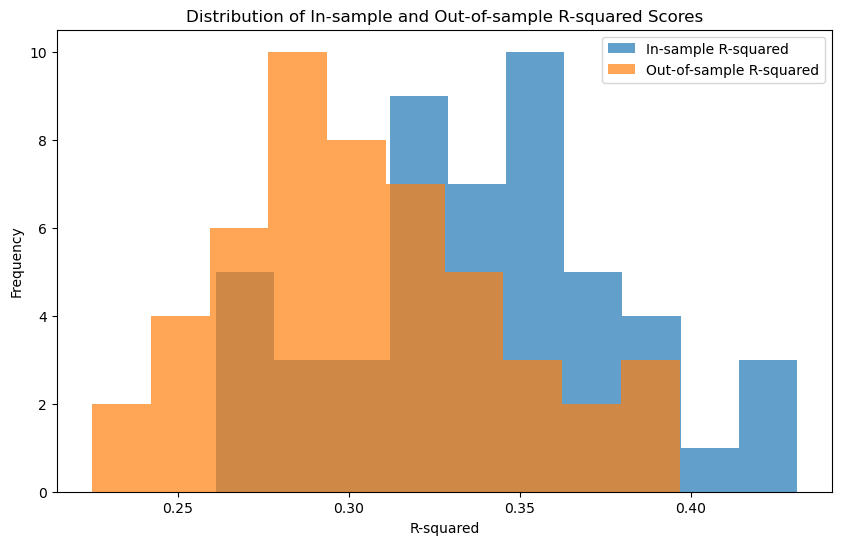

In [17]:
import matplotlib.pyplot as plt

# Initialize lists to collect in-sample and out-of-sample R-squared scores
in_sample_scores = []
out_sample_scores = []

# Number of iterations
iterations = 50

# Loop to perform multiple train/test splits
for _ in range(iterations):
    # Split data without a fixed random seed
    pokeaman_train, pokeaman_test = train_test_split(pokeaman, train_size=0.5)
    
    # Define the model (using model6_linear_form for example)
    model_spec = smf.ols(formula=model6_linear_form, data=pokeaman_train)
    model_fit = model_spec.fit()
    
    # In-sample R-squared
    in_sample_scores.append(model_fit.rsquared)
    
    # Out-of-sample R-squared
    yhat_test = model_fit.predict(pokeaman_test)
    y_test = pokeaman_test.HP
    out_sample_r2 = np.corrcoef(y_test, yhat_test)[0, 1] ** 2
    out_sample_scores.append(out_sample_r2)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.hist(in_sample_scores, bins=10, alpha=0.7, label="In-sample R-squared")
plt.hist(out_sample_scores, bins=10, alpha=0.7, label="Out-of-sample R-squared")
plt.xlabel("R-squared")
plt.ylabel("Frequency")
plt.title("Distribution of In-sample and Out-of-sample R-squared Scores")
plt.legend()
plt.show()


This model creates a distribution of the R-Squared for the datapoints within the sample that we made the model based off of, and then creates a distribution for datapoints outside of the sample. The significant difference in these distributions illustrate the way that the model is fit specifically to the datapoints in the sample and so is less applicable to datapoints that were not in the sample, as the the R-squared value for these data points is much lower.

### 9. Work with a ChatBot to understand the meaning of the illustration below; and, explain this in your own words

In [18]:
model7_gen1_predict_future = smf.ols(formula=model7_linear_form,
                                   data=pokeaman[pokeaman.Generation==1])
model7_gen1_predict_future_fit = model7_gen1_predict_future.fit()
print("'In sample' R-squared:    ", model7_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model7)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model7_gen1_predict_future_fit.rsquared, "(gen1_predict_future)")
y = pokeaman[pokeaman.Generation!=1].HP
yhat = model7_gen1_predict_future_fit.predict(pokeaman[pokeaman.Generation!=1])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1_predict_future)")

'In sample' R-squared:     0.37818209127432456 (original)
'Out of sample' R-squared: 2.2970146021462383e-05 (original)
'In sample' R-squared:     0.5726118179916575 (gen1_predict_future)
'Out of sample' R-squared: 0.11151363354803218 (gen1_predict_future)


In [19]:
model7_gen1to5_predict_future = smf.ols(formula=model7_linear_form,
                                   data=pokeaman[pokeaman.Generation!=6])
model7_gen1to5_predict_future_fit = model7_gen1to5_predict_future.fit()
print("'In sample' R-squared:    ", model7_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model7)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model7_gen1to5_predict_future_fit.rsquared, "(gen1to5_predict_future)")
y = pokeaman[pokeaman.Generation==6].HP
yhat = model7_gen1to5_predict_future_fit.predict(pokeaman[pokeaman.Generation==6])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1to5_predict_future)")

'In sample' R-squared:     0.37818209127432456 (original)
'Out of sample' R-squared: 2.2970146021462383e-05 (original)
'In sample' R-squared:     0.3904756578094535 (gen1to5_predict_future)
'Out of sample' R-squared: 0.23394915464343125 (gen1to5_predict_future)


In [20]:
model6_gen1_predict_future = smf.ols(formula=model6_linear_form,
                                   data=pokeaman[pokeaman.Generation==1])
model6_gen1_predict_future_fit = model6_gen1_predict_future.fit()
print("'In sample' R-squared:    ", model6_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model6)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model6_gen1_predict_future_fit.rsquared, "(gen1_predict_future)")
y = pokeaman[pokeaman.Generation!=1].HP
yhat = model6_gen1_predict_future_fit.predict(pokeaman[pokeaman.Generation!=1])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1_predict_future)")

'In sample' R-squared:     0.3326310334310908 (original)
'Out of sample' R-squared: 0.00038866891913977205 (original)
'In sample' R-squared:     0.4433880517727282 (gen1_predict_future)
'Out of sample' R-squared: 0.1932858534276128 (gen1_predict_future)


In [21]:
model6_gen1to5_predict_future = smf.ols(formula=model6_linear_form,
                                   data=pokeaman[pokeaman.Generation!=6])
model6_gen1to5_predict_future_fit = model6_gen1to5_predict_future.fit()
print("'In sample' R-squared:    ", model6_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model6)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model6_gen1to5_predict_future_fit.rsquared, "(gen1to5_predict_future)")
y = pokeaman[pokeaman.Generation==6].HP
yhat = model6_gen1to5_predict_future_fit.predict(pokeaman[pokeaman.Generation==6])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1to5_predict_future)")

'In sample' R-squared:     0.3326310334310908 (original)
'Out of sample' R-squared: 0.00038866891913977205 (original)
'In sample' R-squared:     0.33517279824114776 (gen1to5_predict_future)
'Out of sample' R-squared: 0.26262690178799936 (gen1to5_predict_future)


These code breakdowns illustrate that with both model 6 and 7, training the model with data from generation 1-5 will create more accurate data for the datapoints outside of the training set. In both cases, because to out of sample R-squared increases when using gen_1to5 rather than gen_1, it is clear that by accounting for more generations, our data will not be thrown off simply by generation specific features that would make the data innacurate.

### ChatBot Summary:

Certainly! Here's a concise summary of our interactions that you can submit as part of your homework:

---

### Summary of Interaction:

1. **Code Explanations**:
   We discussed various code snippets for building and evaluating linear regression models using the Pokémon dataset. The models were created with different combinations of features to predict the "HP" (hit points) of Pokémon. The features included numerical attributes like "Attack," "Defense," "Speed," and categorical variables such as "Generation" and "Type."

2. **Model Performance Metrics**:
   We analyzed how to calculate both **"in-sample"** and **"out-of-sample"** performance metrics, specifically the R-squared value. The "in-sample" R-squared measures how well the model fits the training data, while the "out-of-sample" R-squared evaluates the model's ability to generalize to unseen data.

3. **Multicollinearity**:
   We discussed the issue of multicollinearity in a design matrix, which occurs when predictor variables are highly correlated with one another. This can distort the model's ability to generalize and reduce predictive accuracy on out-of-sample data.

4. **Model Development and Extensions**:
   We explored the process of extending and refining regression models (e.g., `model3`, `model4`, `model5`, `model6`, and `model7`) by adding interactions, scaling variables, and incorporating additional features. Each model was developed step by step, and we discussed how different changes (like adding significant indicators from previous models) influenced predictive performance.

5. **Training Models on Different Subsets of Data**:
   We created multiple models trained on subsets of Pokémon data based on different generations (e.g., Generation 1, Generation 1-5). The models were then tested on unseen data from other generations to assess their ability to generalize. The "in-sample" and "out-of-sample" R-squared values were compared to determine if the model could make accurate predictions for Pokémon from different generations.

6. **Interpretation of Results**:
   The key takeaway from these exercises was that models trained on specific generations of Pokémon (e.g., Generations 1-5) tended to perform well on in-sample data but often showed poor out-of-sample generalization when tested on later generations (e.g., Generation 6). This highlighted the importance of generalizability in predictive modeling, and how different generations introduced new patterns and characteristics not captured by the training data.

7. **Future Predictions**:
   We also explored how models trained on earlier generations (e.g., Generation 1 or Generations 1-5) could be used to predict future generations of Pokémon, and how well the models performed in these scenarios.

---

This summary encapsulates the core aspects of our discussion and the steps taken in the code analysis, model evaluation, and interpretation of results.

https://chatgpt.com/share/673666c7-5c38-8013-92e2-108bfe4256be